In [1]:
#!pip install ewl

In [2]:
%matplotlib inline

In [3]:
from ewl import *

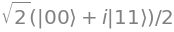

In [4]:
psi = (Qubit('00') + i * Qubit('11')) / sqrt2
psi

In [5]:
theta1, alpha1, beta1 = sp.symbols('theta1 alpha1 beta1')
alice = U(theta=theta1, alpha=alpha1, beta=beta1)
alice

⎡  ⅈ⋅α₁    ⎛θ₁⎞       ⅈ⋅β₁    ⎛θ₁⎞⎤
⎢ ℯ    ⋅cos⎜──⎟    ⅈ⋅ℯ    ⋅sin⎜──⎟⎥
⎢          ⎝2 ⎠               ⎝2 ⎠⎥
⎢                                 ⎥
⎢   -ⅈ⋅β₁    ⎛θ₁⎞   -ⅈ⋅α₁    ⎛θ₁⎞ ⎥
⎢ⅈ⋅ℯ     ⋅sin⎜──⎟  ℯ     ⋅cos⎜──⎟ ⎥
⎣            ⎝2 ⎠            ⎝2 ⎠ ⎦

In [6]:
theta2, alpha2, beta2 = sp.symbols('theta2 alpha2 beta2')
bob = U(theta=theta2, alpha=alpha2, beta=beta2)
bob

⎡  ⅈ⋅α₂    ⎛θ₂⎞       ⅈ⋅β₂    ⎛θ₂⎞⎤
⎢ ℯ    ⋅cos⎜──⎟    ⅈ⋅ℯ    ⋅sin⎜──⎟⎥
⎢          ⎝2 ⎠               ⎝2 ⎠⎥
⎢                                 ⎥
⎢   -ⅈ⋅β₂    ⎛θ₂⎞   -ⅈ⋅α₂    ⎛θ₂⎞ ⎥
⎢ⅈ⋅ℯ     ⋅sin⎜──⎟  ℯ     ⋅cos⎜──⎟ ⎥
⎣            ⎝2 ⎠            ⎝2 ⎠ ⎦

In [7]:
payoff_matrix = Array([
    [
        [3, 5],
        [0, 1],
    ],
    [
        [3, 0],
        [5, 1],
    ],
])
payoff_matrix

⎡⎡3  5⎤  ⎡3  0⎤⎤
⎢⎢    ⎥  ⎢    ⎥⎥
⎣⎣0  1⎦  ⎣5  1⎦⎦

In [8]:
ewl = EWL(psi, [alice, bob], payoff_matrix)
ewl

In [9]:
ewl.J

⎡ √2               -√2⋅ⅈ ⎤
⎢ ──    0     0    ──────⎥
⎢ 2                  2   ⎥
⎢                        ⎥
⎢      √2⋅ⅈ  -√2         ⎥
⎢ 0    ────  ────    0   ⎥
⎢       2     2          ⎥
⎢                        ⎥
⎢      -√2   √2⋅ⅈ        ⎥
⎢ 0    ────  ────    0   ⎥
⎢       2     2          ⎥
⎢                        ⎥
⎢√2⋅ⅈ               -√2  ⎥
⎢────   0     0     ──── ⎥
⎣ 2                  2   ⎦

In [10]:
ewl.J_H

⎡ √2                   -√2⋅ⅈ ⎤
⎢ ──     0       0     ──────⎥
⎢ 2                      2   ⎥
⎢                            ⎥
⎢      -√2⋅ⅈ    -√2          ⎥
⎢ 0    ──────   ────     0   ⎥
⎢        2       2           ⎥
⎢                            ⎥
⎢       -√2    -√2⋅ⅈ         ⎥
⎢ 0     ────   ──────    0   ⎥
⎢        2       2           ⎥
⎢                            ⎥
⎢√2⋅ⅈ                   -√2  ⎥
⎢────    0       0      ──── ⎥
⎣ 2                      2   ⎦

In [11]:
ewl.amplitudes(simplify=False)

⎡    ⎛    ⅈ⋅α₁  ⅈ⋅α₂    ⎛θ₁⎞    ⎛θ₂⎞         -ⅈ⋅β₁  -ⅈ⋅β₂    ⎛θ₁⎞    ⎛θ₂⎞⎞    
⎢    ⎜√2⋅ℯ    ⋅ℯ    ⋅cos⎜──⎟⋅cos⎜──⎟   √2⋅ⅈ⋅ℯ     ⋅ℯ     ⋅sin⎜──⎟⋅sin⎜──⎟⎟    
⎢    ⎜                  ⎝2 ⎠    ⎝2 ⎠                         ⎝2 ⎠    ⎝2 ⎠⎟    
⎢ √2⋅⎜────────────────────────────── + ──────────────────────────────────⎟   √
⎢    ⎝              2                                  2                 ⎠    
⎢ ──────────────────────────────────────────────────────────────────────── + ─
⎢                                    2                                        
⎢                                                                             
⎢     ⎛    ⅈ⋅α₁  -ⅈ⋅β₂    ⎛θ₂⎞    ⎛θ₁⎞         ⅈ⋅α₂  -ⅈ⋅β₁    ⎛θ₁⎞    ⎛θ₂⎞⎞   
⎢     ⎜√2⋅ℯ    ⋅ℯ     ⋅sin⎜──⎟⋅cos⎜──⎟   √2⋅ⅈ⋅ℯ    ⋅ℯ     ⋅sin⎜──⎟⋅cos⎜──⎟⎟   
⎢     ⎜                   ⎝2 ⎠    ⎝2 ⎠                        ⎝2 ⎠    ⎝2 ⎠⎟   
⎢  √2⋅⎜─────────────────────────────── - ─────────────────────────────────⎟   
⎢     ⎝               2                             

In [12]:
ewl.amplitudes()

⎡   ⎛θ₁⎞    ⎛θ₂⎞                   ⎛θ₁⎞    ⎛θ₂⎞             ⎤
⎢sin⎜──⎟⋅sin⎜──⎟⋅sin(β₁ + β₂) + cos⎜──⎟⋅cos⎜──⎟⋅cos(α₁ + α₂)⎥
⎢   ⎝2 ⎠    ⎝2 ⎠                   ⎝2 ⎠    ⎝2 ⎠             ⎥
⎢                                                           ⎥
⎢   ⎛θ₁⎞                 ⎛θ₂⎞      ⎛θ₂⎞    ⎛θ₁⎞             ⎥
⎢sin⎜──⎟⋅sin(α₂ - β₁)⋅cos⎜──⎟ + sin⎜──⎟⋅cos⎜──⎟⋅cos(α₁ - β₂)⎥
⎢   ⎝2 ⎠                 ⎝2 ⎠      ⎝2 ⎠    ⎝2 ⎠             ⎥
⎢                                                           ⎥
⎢   ⎛θ₁⎞    ⎛θ₂⎞                   ⎛θ₂⎞                 ⎛θ₁⎞⎥
⎢sin⎜──⎟⋅cos⎜──⎟⋅cos(α₂ - β₁) + sin⎜──⎟⋅sin(α₁ - β₂)⋅cos⎜──⎟⎥
⎢   ⎝2 ⎠    ⎝2 ⎠                   ⎝2 ⎠                 ⎝2 ⎠⎥
⎢                                                           ⎥
⎢   ⎛θ₁⎞    ⎛θ₂⎞                                ⎛θ₁⎞    ⎛θ₂⎞⎥
⎢sin⎜──⎟⋅sin⎜──⎟⋅cos(β₁ + β₂) - sin(α₁ + α₂)⋅cos⎜──⎟⋅cos⎜──⎟⎥
⎣   ⎝2 ⎠    ⎝2 ⎠                                ⎝2 ⎠    ⎝2 ⎠⎦

In [13]:
ewl.probs()

⎡                                                             2⎤
⎢│   ⎛θ₁⎞    ⎛θ₂⎞                   ⎛θ₁⎞    ⎛θ₂⎞             │ ⎥
⎢│sin⎜──⎟⋅sin⎜──⎟⋅sin(β₁ + β₂) + cos⎜──⎟⋅cos⎜──⎟⋅cos(α₁ + α₂)│ ⎥
⎢│   ⎝2 ⎠    ⎝2 ⎠                   ⎝2 ⎠    ⎝2 ⎠             │ ⎥
⎢                                                              ⎥
⎢                                                             2⎥
⎢│   ⎛θ₁⎞                 ⎛θ₂⎞      ⎛θ₂⎞    ⎛θ₁⎞             │ ⎥
⎢│sin⎜──⎟⋅sin(α₂ - β₁)⋅cos⎜──⎟ + sin⎜──⎟⋅cos⎜──⎟⋅cos(α₁ - β₂)│ ⎥
⎢│   ⎝2 ⎠                 ⎝2 ⎠      ⎝2 ⎠    ⎝2 ⎠             │ ⎥
⎢                                                              ⎥
⎢                                                             2⎥
⎢│   ⎛θ₁⎞    ⎛θ₂⎞                   ⎛θ₂⎞                 ⎛θ₁⎞│ ⎥
⎢│sin⎜──⎟⋅cos⎜──⎟⋅cos(α₂ - β₁) + sin⎜──⎟⋅sin(α₁ - β₂)⋅cos⎜──⎟│ ⎥
⎢│   ⎝2 ⎠    ⎝2 ⎠                   ⎝2 ⎠                 ⎝2 ⎠│ ⎥
⎢                                                              ⎥
⎢                        

In [14]:
ewl.payoff_function(player=0)

In [15]:
ewl.payoff_function(player=1)

In [16]:
ewl.payoff_function(player=None)

In [17]:
ewl.params

In [18]:
ewl_fixed = ewl.fix(theta1=pi / 2, alpha1=pi / 2, beta1=0,
                    theta2=0, alpha2=0, beta2=0)

In [19]:
ewl_fixed.params

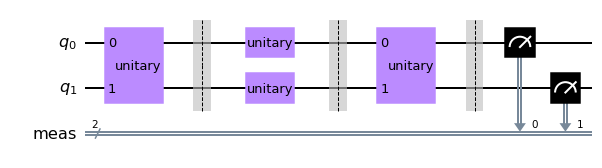

In [20]:
ewl_fixed.draw()

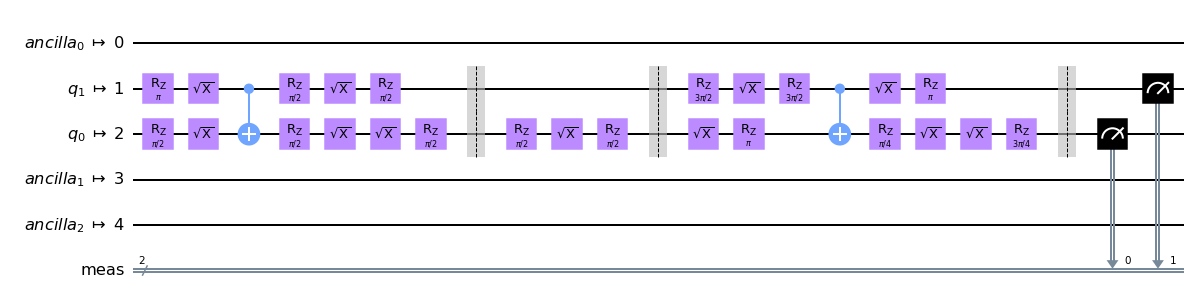

In [21]:
ewl_fixed.draw_transpiled(backend_name='ibmq_athens', optimization_level=3)

{'01': 0.5, '11': 0.5}


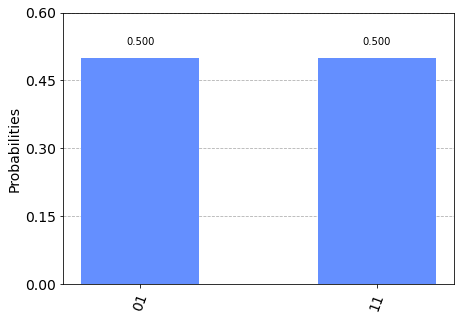

In [22]:
probs = ewl_fixed.simulate_probs()
print(probs)
plot_histogram(probs)

{'11': 532, '01': 492}


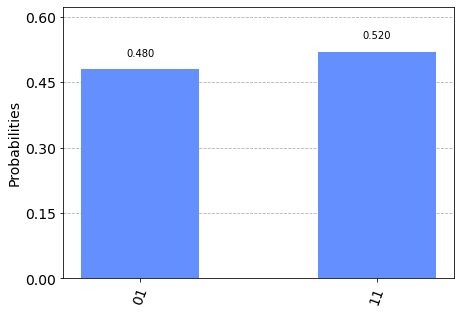

In [23]:
counts_qasm_simulator = ewl_fixed.simulate_counts()
print(counts_qasm_simulator)
plot_histogram(counts_qasm_simulator)

Job Status: job has successfully run
{'00': 87, '01': 450, '10': 74, '11': 413}


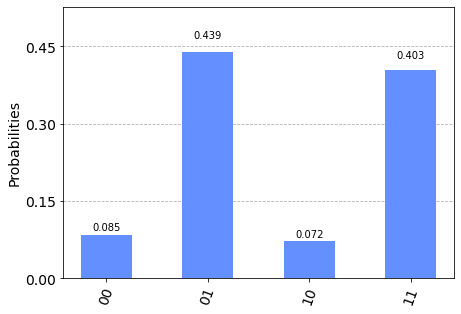

In [24]:
counts_quantum_device = ewl_fixed.run()
print(counts_quantum_device)
plot_histogram(counts_quantum_device)

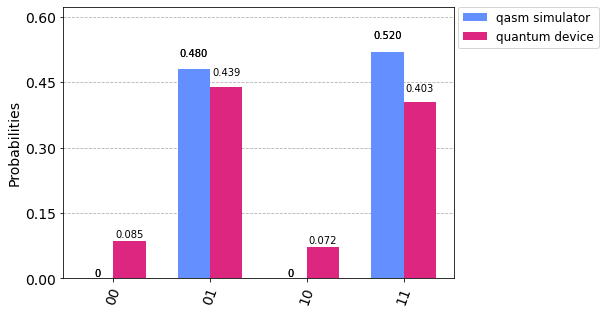

In [25]:
plot_histogram(data=[counts_qasm_simulator, counts_quantum_device],
               legend=['qasm simulator', 'quantum device'])